<a href="https://colab.research.google.com/github/chrispinheiro/tech-challenge/blob/main/techChalenge_fase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
Seguro_saude = pd.read_csv('seguro_saude1.csv', encoding="latin1")

In [3]:
# Visualizando as primeiras linhas do DataFrame para verificar a estrutura dos dados
print(Seguro_saude.head())

   Idade     Gênero    IMC  Filhos Fumante Região  Encargos
0     76  Masculino  38.02       5     Sim  Norte   3303.69
1     82   Feminino  35.39       2     Não  Norte   3698.08
2     59  Masculino  34.09       2     Sim  Leste   1753.68
3     47      Outro  39.00       3     Não  Norte   2188.92
4     40  Masculino  20.53       4     Não  Norte   4988.15


In [4]:
# Calculando estatísticas descritivas básicas
estatisticas_descritivas = Seguro_saude.describe()
print(estatisticas_descritivas)

             Idade          IMC       Filhos     Encargos
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     54.647000    27.419080     2.445000  2940.690790
std      21.355759     7.285782     1.701726  1152.541168
min      18.000000    15.020000     0.000000  1002.810000
25%      37.000000    21.322500     1.000000  1929.520000
50%      55.000000    27.225000     2.000000  2886.095000
75%      74.000000    33.855000     4.000000  3967.890000
max      90.000000    40.000000     5.000000  4996.930000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

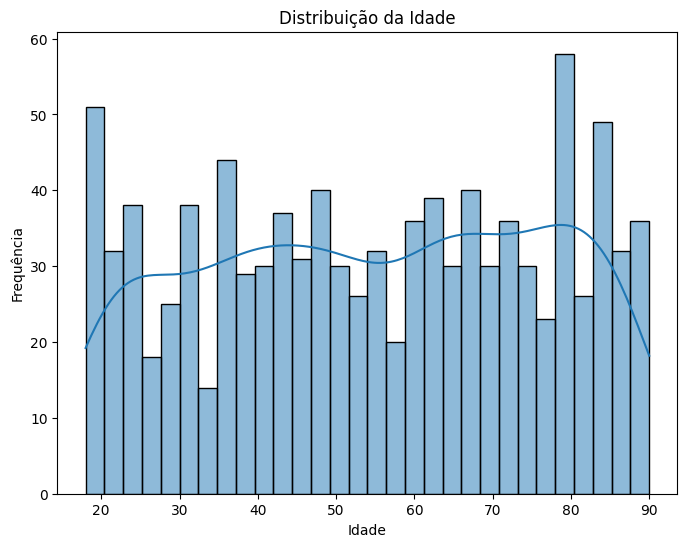

In [7]:
#distribuicao pela idade
plt.figure(figsize=(8, 6))
sns.histplot(Seguro_saude['Idade'], bins=30, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

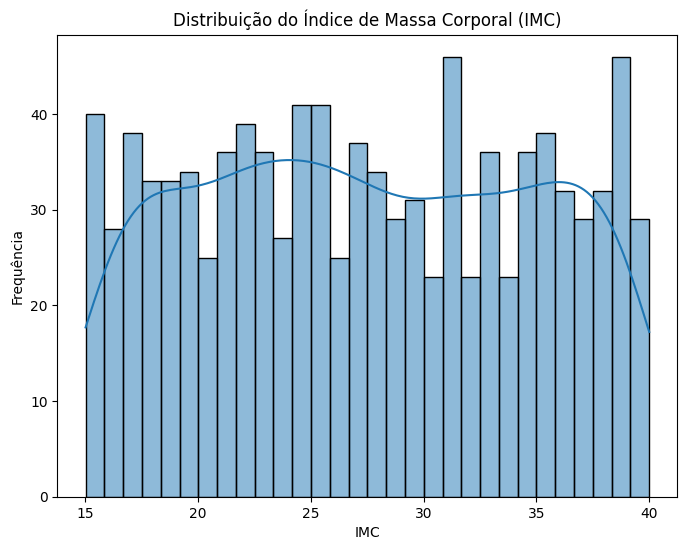

In [9]:
#distribuicao pelo IMC
plt.figure(figsize=(8, 6))
sns.histplot(Seguro_saude['IMC'], bins=30, kde=True)
plt.title('Distribuição do Índice de Massa Corporal (IMC)')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.show()

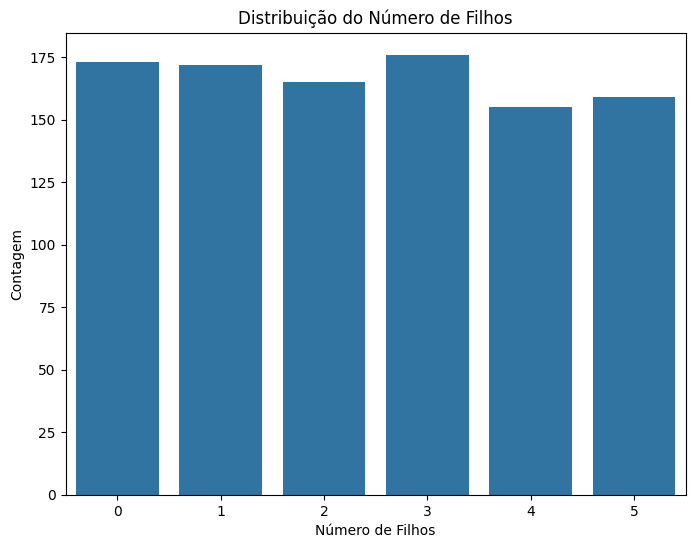

In [10]:
#Distribuicao pelo numero de filhos
plt.figure(figsize=(8, 6))
sns.countplot(data=Seguro_saude, x='Filhos')
plt.title('Distribuição do Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Contagem')
plt.show()

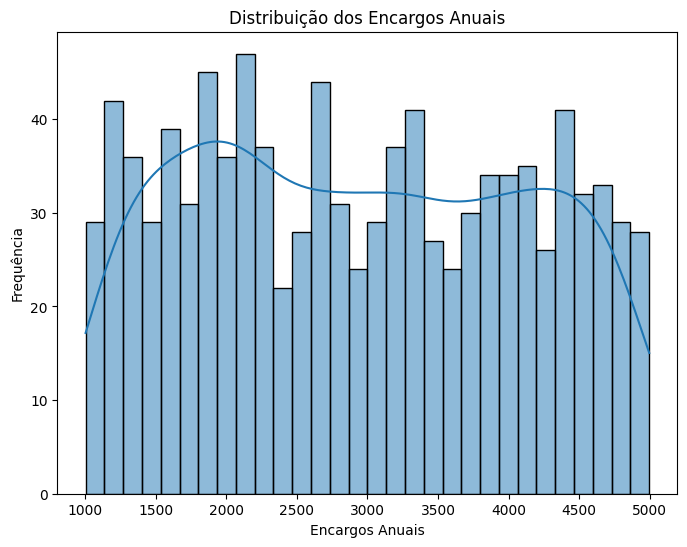

In [11]:
#Distribuicao pelos encargos anuais
plt.figure(figsize=(8, 6))
sns.histplot(Seguro_saude['Encargos'], bins=30, kde=True)
plt.title('Distribuição dos Encargos Anuais')
plt.xlabel('Encargos Anuais')
plt.ylabel('Frequência')
plt.show()

In [12]:
# Tratando valores ausentes na coluna IMC com a média
Seguro_saude['IMC'].fillna(Seguro_saude['IMC'].mean(), inplace=True)
Seguro_saude.head()

,Idade,Gênero,IMC,Filhos,Fumante,Região,Encargos
0,76,Masculino,38.02,5,Sim,Norte,3303.69
1,82,Feminino,35.39,2,Não,Norte,3698.08
2,59,Masculino,34.09,2,Sim,Leste,1753.68
3,47,Outro,39.00,3,Não,Norte,2188.92
4,40,Masculino,20.53,4,Não,Norte,4988.15


In [13]:
# Preencher valores ausentes na coluna Encargos Anuais com a mediana
Seguro_saude['Encargos'].fillna(Seguro_saude['Encargos'].median(), inplace=True)
Seguro_saude.Encargos

0      3303.69
1      3698.08
2      1753.68
3      2188.92
4      4988.15
        ...   
995    1823.27
996    2202.06
997    4181.94
998    2801.06
999    3503.53
Name: Encargos, Length: 1000, dtype: float64

In [14]:
# Remover linhas com valores ausentes em qualquer coluna
Seguro_saude.dropna(axis=0, how='any', inplace=True)

In [15]:
# Verificar se ainda existem valores ausentes
valores_ausentes_apos_tratamento = Seguro_saude.isnull().sum()
print(valores_ausentes_apos_tratamento)



Idade       0
Gênero      0
IMC         0
Filhos      0
Fumante     0
Região      0
Encargos    0
dtype: int64


In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Seguro_saude['Fumante'] = label_encoder.fit_transform(Seguro_saude['Fumante'])
print(Seguro_saude.head())


   Idade     Gênero    IMC  Filhos  Fumante Região  Encargos
0     76  Masculino  38.02       5        1  Norte   3303.69
1     82   Feminino  35.39       2        0  Norte   3698.08
2     59  Masculino  34.09       2        1  Leste   1753.68
3     47      Outro  39.00       3        0  Norte   2188.92
4     40  Masculino  20.53       4        0  Norte   4988.15


In [19]:
print(Seguro_saude.describe())  # Estatísticas resumidas
print(Seguro_saude.info())       # Informações sobre o DataFrame
print(Seguro_saude.head())       # Visualizar as primeiras linhas

             Idade          IMC       Filhos      Fumante     Encargos
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean     54.647000    27.419080     2.445000     0.511000  2940.690790
std      21.355759     7.285782     1.701726     0.500129  1152.541168
min      18.000000    15.020000     0.000000     0.000000  1002.810000
25%      37.000000    21.322500     1.000000     0.000000  1929.520000
50%      55.000000    27.225000     2.000000     1.000000  2886.095000
75%      74.000000    33.855000     4.000000     1.000000  3967.890000
max      90.000000    40.000000     5.000000     1.000000  4996.930000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Idade     1000 non-null   int64  
 1   Gênero    1000 non-null   object 
 2   IMC       1000 non-null   float64
 3   Filhos    1000 non-null   int64  
 4   Fumante   1000 no

In [25]:
Seguro_saude['Gênero'] = label_encoder.fit_transform(Seguro_saude['Gênero'])

In [26]:
Seguro_saude['Região'] = label_encoder.fit_transform(Seguro_saude['Região'])

In [27]:
print(Seguro_saude)

     Idade  Gênero    IMC  Filhos  Fumante  Região  Encargos
0       76       1  38.02       5        1       2   3303.69
1       82       0  35.39       2        0       2   3698.08
2       59       1  34.09       2        1       1   1753.68
3       47       2  39.00       3        0       2   2188.92
4       40       1  20.53       4        0       2   4988.15
..     ...     ...    ...     ...      ...     ...       ...
995     76       0  34.62       2        0       4   1823.27
996     35       2  15.13       1        1       0   2202.06
997     63       0  20.56       2        1       0   4181.94
998     69       1  36.35       2        0       1   2801.06
999     44       1  38.95       4        1       0   3503.53

[1000 rows x 7 columns]


In [28]:
corr_matrix = Seguro_saude.corr()
corr_matrix["Encargos"].sort_values(ascending=False)


Encargos    1.000000
Fumante     0.032829
Filhos      0.001021
IMC         0.000912
Região     -0.006545
Gênero     -0.042015
Idade      -0.054858
Name: Encargos, dtype: float64

In [30]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Dividindo os dados em recursos (X) e rótulos (y)
X = Seguro_saude.drop(columns=['Encargos'],axis=1)  # Recursos: todas as colunas exceto 'Encargos Anuais'
y = Seguro_saude['Encargos']  # Rótulos: coluna 'Encargos Anuais'

In [34]:
from sklearn.preprocessing import StandardScaler
# Padronizando os dados
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

In [36]:
# Exibindo os dados padronizados
df_padronizado = pd.DataFrame(X_padronizado, columns=X.columns)
df_padronizado['Encargos Anuais'] = y  # Adicionando a coluna 'Encargos Anuais' de volta ao DataFrame
print(df_padronizado)

        Idade    Gênero       IMC    Filhos   Fumante    Região  \
0    1.000371 -0.066415  1.455743  1.502168  0.978237 -0.008394   
1    1.281466 -1.296320  1.094585 -0.261630 -1.022247 -0.008394   
2    0.203935 -0.066415  0.916066 -0.261630  0.978237 -0.707873   
3   -0.358256  1.163490  1.590319  0.326303 -1.022247 -0.008394   
4   -0.686200 -0.066415 -0.946024  0.914235 -1.022247 -0.008394   
..        ...       ...       ...       ...       ...       ...   
995  1.000371 -1.296320  0.988847 -0.261630 -1.022247  1.390565   
996 -0.920446  1.163490 -1.687565 -0.849563  0.978237 -1.407352   
997  0.391331 -1.296320 -0.941905 -0.261630  0.978237 -1.407352   
998  0.672427 -0.066415  1.226414 -0.261630 -1.022247 -0.707873   
999 -0.498803 -0.066415  1.583452  0.914235  0.978237 -1.407352   

     Encargos Anuais  
0            3303.69  
1            3698.08  
2            1753.68  
3            2188.92  
4            4988.15  
..               ...  
995          1823.27  
996        

In [38]:
import statsmodels.api as sm
# Adicionar uma constante para o termo de intercepto (o que é?)
df_padronizado['Intercepto'] = 1
# Definir as variáveis independentes (X)
X = df_padronizado[['Idade', 'Gênero', 'IMC','Filhos','Fumante','Região','Intercepto']]
# Definir a variável dependente (Y)
Y = df_padronizado['Encargos Anuais']
# Criar e ajustar o modelo de regressão linear múltipla
modelo = sm.OLS(Y, X).fit()
# Imprimir os resultados do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        Encargos Anuais   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9703
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.444
Time:                        18:42:17   Log-Likelihood:                -8465.2
No. Observations:                1000   AIC:                         1.694e+04
Df Residuals:                     993   BIC:                         1.698e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Idade        -63.4075     36.473     -1.738      0.0

<Axes: >

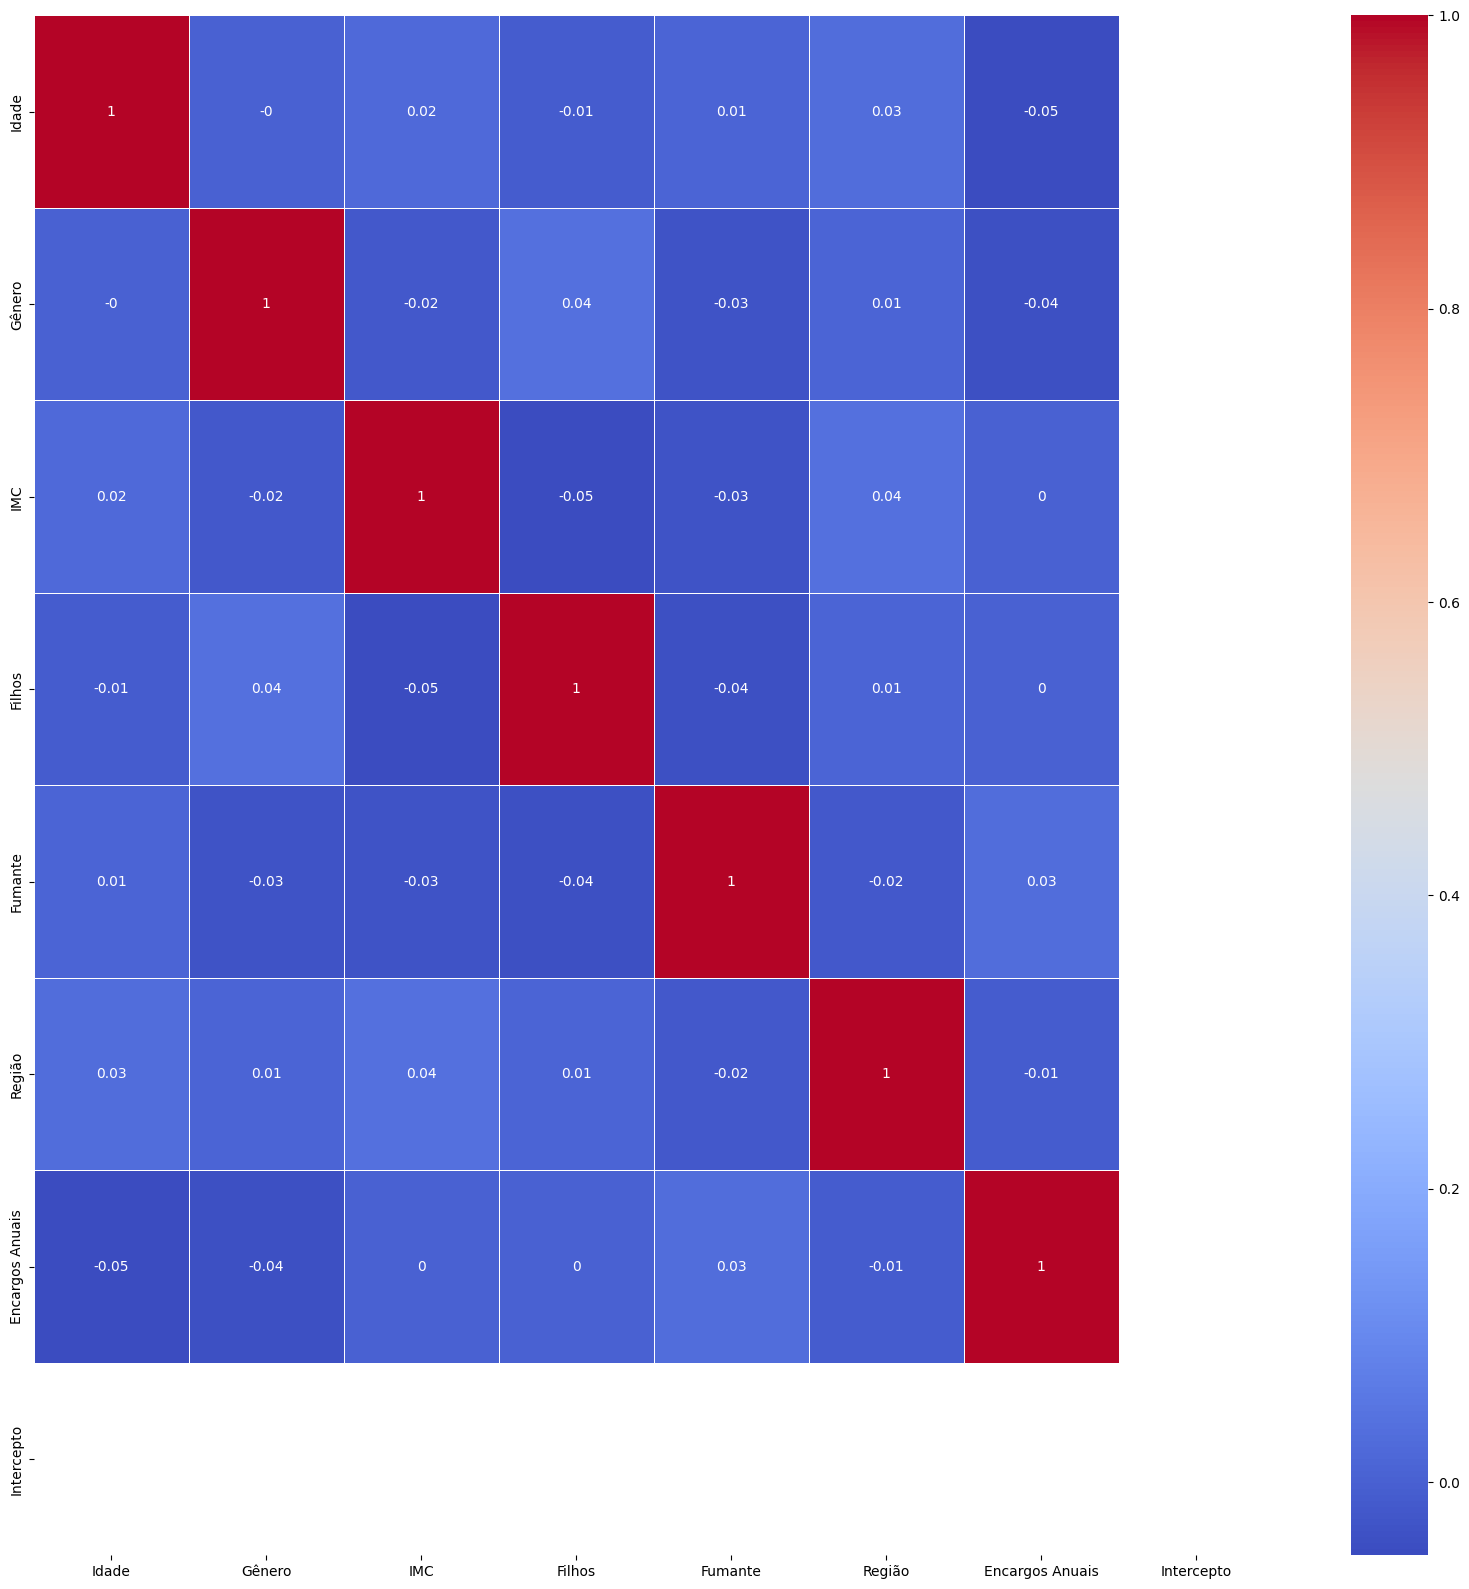

In [39]:
numeric_columns = df_padronizado.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr().round(2)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

In [40]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
modelo = LinearRegression()

# Treinando o modelo com os dados de treinamento
modelo.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = modelo.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE): ", mse)  # Erro Quadrático Médio
print("Coeficiente de Determinação (R2): ", r2)  # Coeficiente de Determinação

Erro Quadrático Médio (MSE):  1383660.7089910447
Coeficiente de Determinação (R2):  -0.005307359628543562
